# Esercitazione 12

## Esercizio 1

Utilizzo due ottimizzatori diversi da sgd: Adam e Adagrad. 

Importo le librerie necessarie e inizializzo il generatore di numeri casuali.

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

Importo il dataset e divido i dati in training e test.

In [2]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 6


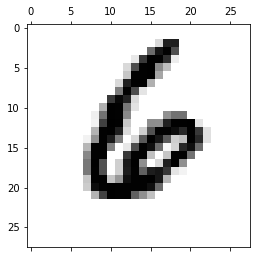

an example of a data point with label 6 before to_categorical ...
... and with label [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [3]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[13])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[13,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[13], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[13], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

Scrivo una funzione con la quale creare la rete neurale. Riduco progressivamente il numero di neuroni e vario la funzione di attivazione, scegliendo softmax per l'ultimo layer.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


# Ottimizzazione con Adam

Eseguo una ottimizzazione utilizzando Adam, anzichè una semplice SGD.

In [5]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model_Adam():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


Avendo osservato che 5 epoche risultano insufficienti per avere una precisione soddisfacente, e che si è ancora lontani dalla situazione di overfitting, decido di procedere con 20 epoche.

In [6]:
# training parameters
batch_size = 32
epochs = 20

# create the deep neural net
model_DNN = compile_model_Adam()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0, #put to zero to avoid excessive output
          validation_data=(X_test, Y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.1113 - accuracy: 0.9830

Test loss: 0.11127875000238419
Test accuracy: 0.9829999804496765


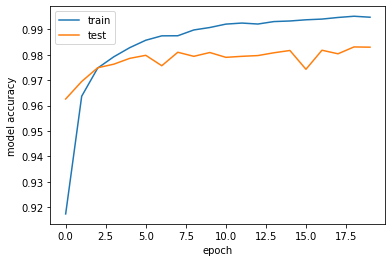

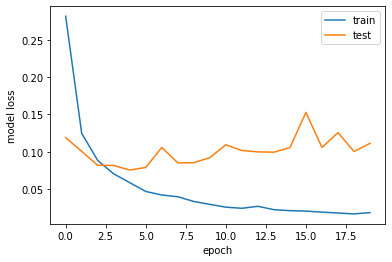

In [7]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Da questo grafico posso osservare che, come è normale che sia, l'errore sul set di test risulta più alto rispetto a quello di training. Si inizi a notare un graduale aumento della loss già dalla quinta epoca, segno che il modello diventa persino troppo complesso e si rischia l'overfitting.

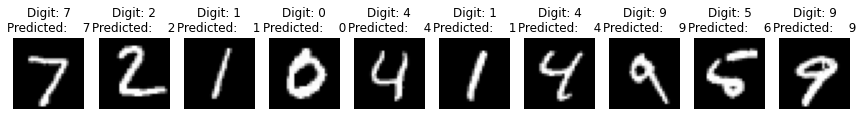

In [8]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Valutando il modello su questi pochi singoli numeri, osservo che la performance è buona: c'è un solo errore su 10 predizioni, che peraltro avrebbe forse commesso persino un umano.

# Ottimizzazione con Adagrad

Eseguo ora una ottimizzazione utilizzando Adagrad. Definisco una nuova funzione _compile_model_Adagrad_.

In [9]:
def compile_model_Adagrad():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


Avendo osservato che 5 epoche risultano insufficienti per avere una precisione soddisfacente, e che si è ancora lontani dalla situazione di overfitting, decido di procedere con 12 epoche.

In [10]:
# training parameters
batch_size = 32
epochs = 50

# create the deep neural net
model_DNN = compile_model_Adagrad()

X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)


# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0, #put to zero to avoid excessive output
          validation_data=(X_test, Y_test))

KeyboardInterrupt: 

In [ ]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Viene commesso lo stesso errore del caso precedente, che di nuovo reputo accettabile.

## Esercizio 2: CNN

Ora procedo ad eseguire un'analisi utilizzando una rete convoluzionale. 

In [ ]:
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Aggiungo vari strati alla rete convoluzionale: eseguo dei pooling, Flatten e concludo con un Dropout prima di ottenere il risultato finale tramite una softmax, che è miglior opzione della funzione di attivazione finale per un problema di classificazione di questo tipo.

In [ ]:
def create_CNN():
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5),activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, kernel_size=(5, 5),activation='elu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(80, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,optimizer='SGD',metrics=['accuracy'])
    return model

Ora, alleno e testo la rete.

In [ ]:
# training parameters
batch_size = 32
epochs = 10
# create the deep conv net
model_CNN = create_CNN()
# train CNN
model_CNN.fit(X_train, Y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## Esercizio 3
Ora utilizzo dei numeri da me disegnati con pimp per vedere se la predizione della mia rete allenata risulta corretta.

In [ ]:
from PIL import Image
import os

fig, axs = plt.subplots(1,10, sharey=True, tight_layout=True)

#data = np.array(np.zeros((28,28))

for num in range(10):
    np.append(data, np.zeros)

                
for num in range(10):

    digit_filename = "./es12/num"+str(num)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    #data[num] = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[num][i,j]=pix[j,i]

    data[num] /= 255

    #plt.figure(figsize=(20,20))
    axs[num].imshow(data[num], cmap='gray')

plt.show()


print("Image size: "+str(xdim)+"x"+str(ydim)+" pixels")
print(data[1].shape)

In [ ]:
for num in range(10):
    print(data[num].shape)
    data[num] = data[num].reshape(1,xdim*ydim)
    print(data.shape)
    pred_0 = model_DNN.predict(data)

    data = data.reshape(xdim,ydim)

    plt.figure(figsize=(5, 5))  
    plt.imshow(data, cmap='gray')    
    plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
    plt.axis('off') 
    plt.show()